In [17]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import datetime
from PIL import Image
s = tf.InteractiveSession()

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/DL-HW1/Q1_train.csv')
data_test = pd.read_csv('/content/drive/My Drive/DL-HW1/Q1_test.csv')

In [4]:
#Getting the labels
labels = data.iloc[:,0]
labels_t = data_test.iloc[:,0]
data.drop(columns = ['label'],inplace = True)
data_test.drop(columns = ['label'],inplace = True)
#standarizing
data = data/255
data_test = data_test/255

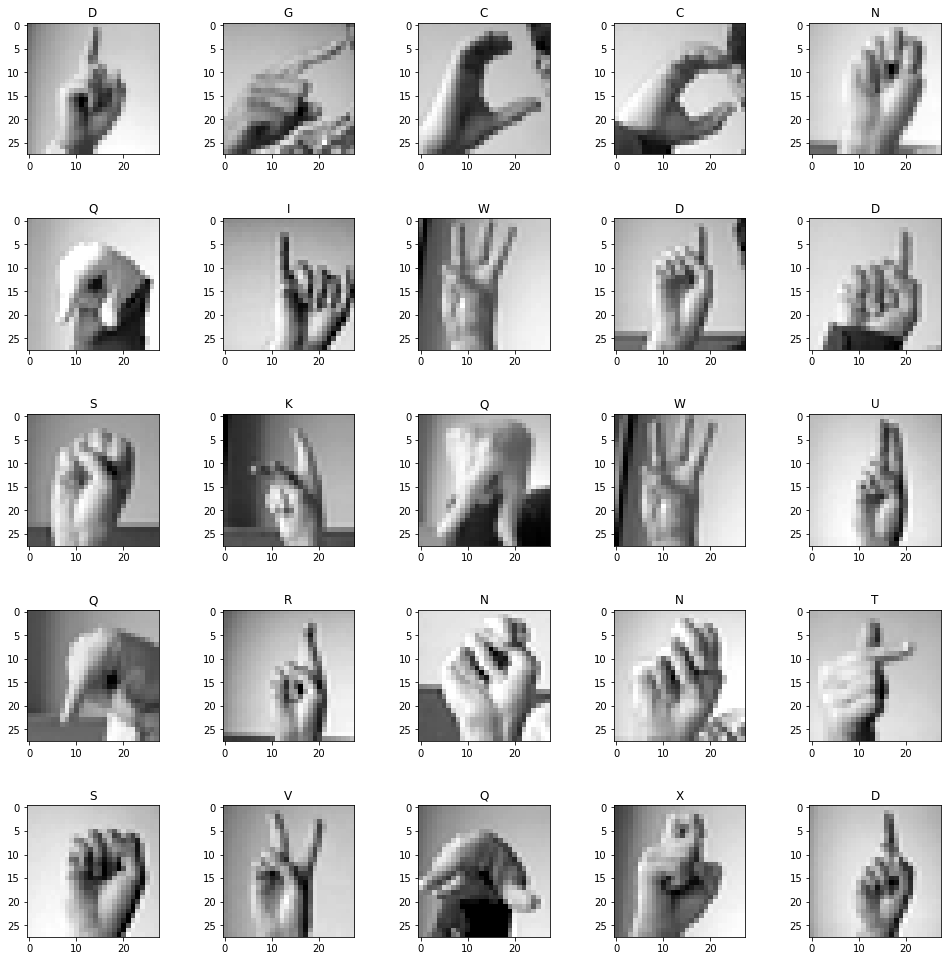

In [ ]:
fig , ax = plt.subplots(nrows=5, ncols= 5, figsize = (14, 14))
ax = ax.flatten()
fig.tight_layout(pad=3.0)
for i, a in enumerate(ax):   
    a.imshow(data.values[i][:].reshape(28, 28), cmap = 'gray')
    a.set(title = string.ascii_letters[26+labels[i]])

In [5]:
#splitting the data
X_train, X_validation, y_train, y_validation = train_test_split(data, labels,test_size = 0.2, random_state = 123)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_validation = lb.transform(y_validation)
y_test = lb.transform(labels_t)

In [379]:
#features of model
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 1024
num_layers_1 = 1024
num_layers_2 = 1024
num_layers_3 = 1024
starter_learning_rate = 0.0005
starter_learning_rate2 = 0.025

In [353]:
#inputs and outputs
X_in = tf.placeholder('float32',shape =(None,num_features),name="X_in")
y_in = tf.placeholder('float32',shape = (None,num_classes),name='y_in')

In [387]:
# Weights initialized by random normal function with std_dev = sqrt(4/(number of input features+ number of output features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(tf.sqrt(4/float(num_features + num_layers_0 )))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(tf.sqrt(4/float(num_layers_0 + num_layers_1)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(tf.sqrt(4/float(num_layers_1 + num_layers_2 )))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_layers_3], stddev=(tf.sqrt(4/float(num_layers_2 + num_layers_3)))))
bias_3 = tf.Variable(tf.random_normal([num_layers_3]))
weights_4 = tf.Variable(tf.random_normal([num_layers_3,num_output], stddev=(tf.sqrt(1/float(num_layers_3 )))))
bias_4 = tf.Variable(tf.random_normal([num_output]))
#weights_5 = tf.Variable(tf.random_normal([num_layers_4,num_output], stddev=(tf.sqrt(1/float(num_layers_4)))))
#bias_5 = tf.Variable(tf.random_normal([num_output]))

In [413]:
# Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)  +bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2) +bias_2)
hidden_output_3 = tf.nn.relu(tf.matmul(hidden_output_2,weights_3) +bias_3)
#hidden_output_4 = tf.nn.relu(tf.matmul(hidden_output_3,weights_4) +bias_4)
y_pred = tf.sigmoid(tf.matmul(hidden_output_3,weights_4) +bias_4)

In [414]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred,labels=y_in))

In [432]:
#learning rate of Dynamic type
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 8, 0.965, staircase=True)
learning_rate2 = tf.train.exponential_decay(starter_learning_rate, 0, 4, 0.95, staircase=True)

# Note:
Take into note that learning rate is set dynamically and decays over the epoches so the learning process is done much more better!

In [433]:
# Adam optimzer for finding the right weight

#Two optimizers are set on our network at the first place 

optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,weights_4,
                                                                         bias_0,bias_1,bias_2, bias_3,bias_4])
optimizer_sgd = tf.train.GradientDescentOptimizer(starter_learning_rate2).minimize(loss,var_list=[weights_0,weights_1,weights_2, weights_3,
                                                                         bias_0,bias_1,bias_2, bias_3])
optimizer_rms = tf.compat.v1.train.RMSPropOptimizer(starter_learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,weights_4,
                                                                         bias_0,bias_1,bias_2, bias_3,bias_4])

In [417]:
#calculating accuaracy
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [360]:
#splitting train and test
X_train, X_validation= X_train.values, X_validation.values
X_test = data_test.values

AttributeError: ignored

In [437]:
def augmentor(arr):
  batch_1 = np.random.choice(range(0, len(X_train)), size = 100)
  for j in range(100):
    arr[batch_1[j], :] = (np.flip((arr[batch_1[j], :].reshape(28, 28)), axis = 1)).reshape(1, -1)
  
  batch_2 = np.random.choice(range(0, len(X_train)), size = 100)
  dataset = tf.placeholder(tf.float32, [None, 28*28])
  images = tf.reshape(dataset, (-1, 28, 28,1))
  random_angles = tf.random.uniform(shape = (100, ), minval = -np
    .pi / 4, maxval = np.pi / 4)

  rotated_images = tf.contrib.image.transform(
    images,
    tf.contrib.image.angles_to_projective_transforms(
        random_angles, tf.cast(28, tf.float32), tf.cast(28, tf.float32)
    ))
  arr[batch_2, :] = s.run(rotated_images, feed_dict = {dataset : arr[batch_2,:]}).reshape(-1, 28*28)
  
  
  batch_31 = np.random.choice(range(0, len(X_train)), size = 100)
  batch_3 = np.random.randint(0, 10, size = (100, 2))
  for i in range(100):
    l = arr[batch_31[i], :].reshape(28, 28)
    arr[batch_31[i], :] = np.array(Image.fromarray(l[batch_3[i,0]:batch_3[i,0]+18, batch_3[i,1]:batch_3[i,1]+18]).resize((28, 28), Image.ANTIALIAS)).reshape(1, -1)
  return arr


In [419]:
X_t = augmentor(X_train.copy())

In [386]:
# Training parameters with adam optimizer and without Dropout
batch_size = 170
epochs= 40
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
tt_accuracy = []
tt_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))
    tt_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(y_pred, {X_in: X_test}).argmax(1)))
    tt_loss.append(s.run(loss, {X_in: X_test, 
                                      y_in: y_test}))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}, tt acc : {tt_accuracy[epoch]}, tt loss: {tt_loss[epoch]}")

Epoch:0, Train loss: 2.82 Train acc: 0.128, Test acc:0.123, tt acc : 0.11126603457891801, tt loss: 2.8552656173706055
Epoch:1, Train loss: 2.55 Train acc: 0.328, Test acc:0.317, tt acc : 0.30200780814277745, tt loss: 2.5942113399505615
Epoch:2, Train loss: 2.46 Train acc: 0.467, Test acc:0.453, tt acc : 0.3654489682097044, tt loss: 2.537245988845825
Epoch:3, Train loss: 2.44 Train acc: 0.559, Test acc:0.556, tt acc : 0.5082264361405465, tt loss: 2.5362050533294678
Epoch:4, Train loss: 2.37 Train acc: 0.651, Test acc:0.651, tt acc : 0.5649749023982152, tt loss: 2.465545892715454
Epoch:5, Train loss: 2.34 Train acc: 0.707, Test acc:0.707, tt acc : 0.6069436698271055, tt loss: 2.465459108352661
Epoch:6, Train loss: 2.36 Train acc: 0.724, Test acc:0.727, tt acc : 0.589654210819855, tt loss: 2.4949772357940674
Epoch:7, Train loss: 2.32 Train acc: 0.796, Test acc:0.796, tt acc : 0.6674567763524819, tt loss: 2.4671006202697754
Epoch:8, Train loss: 2.30 Train acc: 0.850, Test acc:0.852, tt acc

# Note on accuaracy of model
> take into account that accuracy of model(train and test) in adam optimizer can go up to 0.93 depending on the random state we are in and in different running and is varaiable between 0.78 and 0.95



Train Accuracy: 0.97
Test Accuracy:0.97
Train Loss: 2.27
Test Loss:2.27


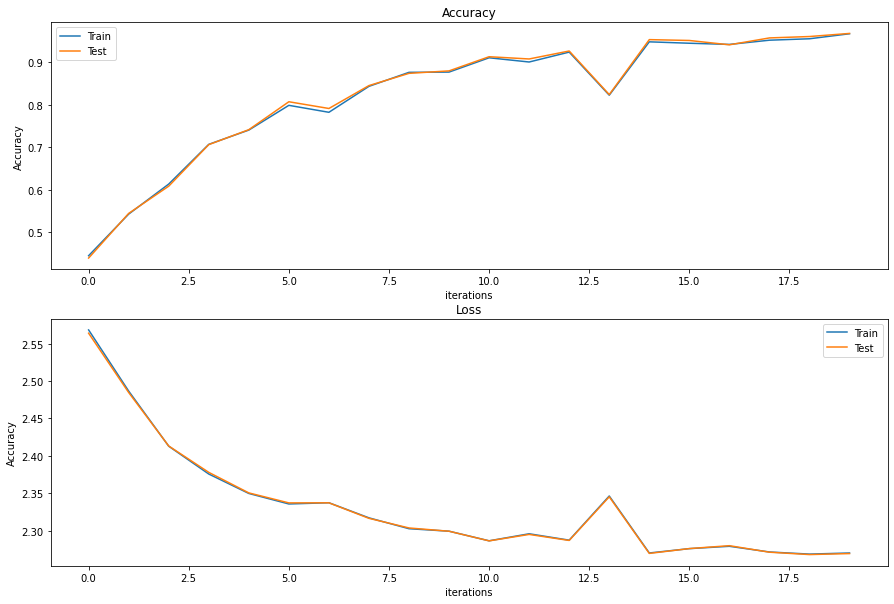

In [ ]:
iterations = list(range(epochs))
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize = (15, 10))
ax[0].plot(iterations, training_accuracy, label='Train')
ax[0].plot(iterations, testing_accuracy, label='Test')
ax[0].set(title = 'Accuracy',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[0].legend()
ax[1].plot(iterations, training_loss, label='Train')
ax[1].plot(iterations, testing_loss, label='Test')
ax[1].set(title = 'Loss',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[1].legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))
print("Train Loss: {0:.2f}".format(training_loss[-1]))
print("Test Loss:{0:.2f}".format(testing_loss[-1]))

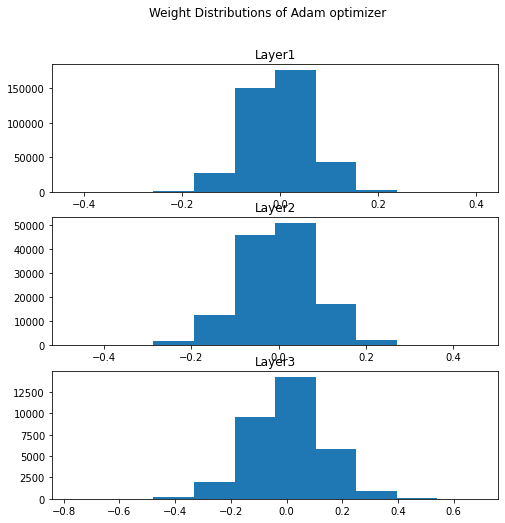

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols=1,figsize = (8, 8))
for i, a in enumerate(ax):   
    if i==0:
      a.hist(s.run(weights_0).reshape(-1,1), bins = 10)
    elif i==1:
      a.hist(s.run(weights_1).reshape(-1,1), bins = 10)
    else : 
      a.hist(s.run(weights_2).reshape(-1,1), bins = 10)
    a.set(title = 'Layer' + str(i+1))
fig.suptitle('Weight Distributions of Adam optimizer');

In [ ]:
# Training parameters with sgd potimizer and without dropout
X_train = X_train + (0.35)*np.random.randn(X_train.shape[0],X_train.shape[1])
batch_size = 128
epochs=250
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
tt_accuracy = []
tt_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
       s.run(optimizer_sgd, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))
    tt_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(y_pred, {X_in: X_test}).argmax(1)))
    tt_loss.append(s.run(loss, {X_in: X_test, 
                                      y_in: y_test}))
    if epoch%10 == 0:
      print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}, tt acc : {tt_accuracy[epoch]}, tt loss: {tt_loss[epoch]}")


Epoch:0, Train loss: 3.13 Train acc: 0.080, Test acc:0.114, tt acc : 0.07348020078081428, tt loss: 3.1547036170959473
Epoch:10, Train loss: 2.73 Train acc: 0.303, Test acc:0.389, tt acc : 0.3312883435582822, tt loss: 2.7029101848602295
Epoch:20, Train loss: 2.64 Train acc: 0.360, Test acc:0.445, tt acc : 0.3796709425543781, tt loss: 2.631068468093872
Epoch:30, Train loss: 2.60 Train acc: 0.397, Test acc:0.490, tt acc : 0.4279141104294479, tt loss: 2.609750270843506
Epoch:40, Train loss: 2.56 Train acc: 0.428, Test acc:0.537, tt acc : 0.4650027886224205, tt loss: 2.581188440322876
Epoch:50, Train loss: 2.53 Train acc: 0.458, Test acc:0.592, tt acc : 0.5234244283324038, tt loss: 2.5589170455932617
Epoch:60, Train loss: 2.51 Train acc: 0.466, Test acc:0.585, tt acc : 0.49191299498047963, tt loss: 2.556420087814331
Epoch:70, Train loss: 2.49 Train acc: 0.489, Test acc:0.614, tt acc : 0.5278862242052426, tt loss: 2.53926682472229
Epoch:80, Train loss: 2.47 Train acc: 0.497, Test acc:0.616, 

Train Accuracy: 0.72
Test Accuracy:0.79
Train Loss: 2.34
Test Loss:2.37


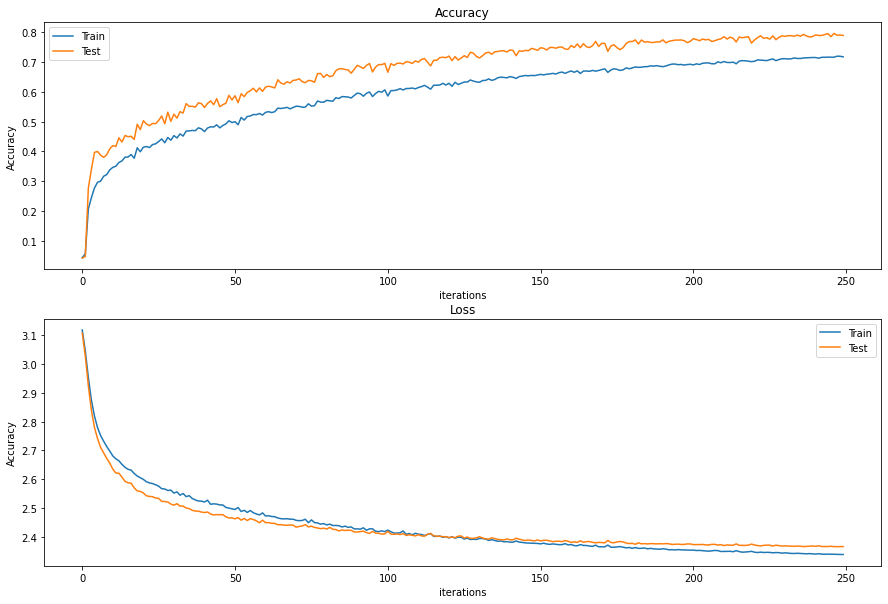

In [ ]:
iterations = list(range(epochs))
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize = (15, 10))
ax[0].plot(iterations, training_accuracy, label='Train')
ax[0].plot(iterations, testing_accuracy, label='Test')
ax[0].set(title = 'Accuracy',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[0].legend()
ax[1].plot(iterations, training_loss, label='Train')
ax[1].plot(iterations, testing_loss, label='Test')
ax[1].set(title = 'Loss',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[1].legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))
print("Train Loss: {0:.2f}".format(training_loss[-1]))
print("Test Loss:{0:.2f}".format(testing_loss[-1]))

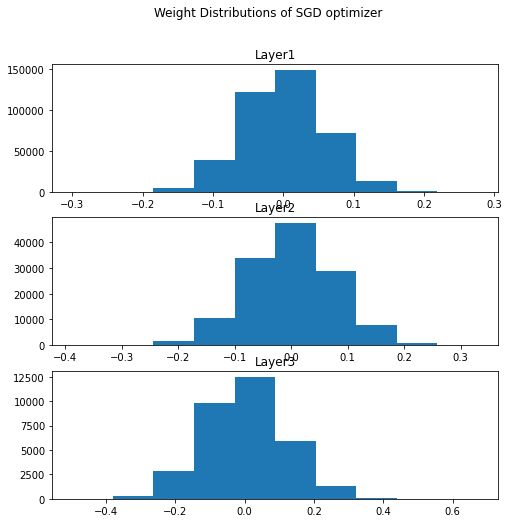

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols=1,figsize = (8, 8))
for i, a in enumerate(ax):   
    if i==0:
      a.hist(s.run(weights_0).reshape(-1,1), bins = 10)
    elif i==1:
      a.hist(s.run(weights_1).reshape(-1,1), bins = 10)
    else : 
      a.hist(s.run(weights_2).reshape(-1,1), bins = 10)
    a.set(title = 'Layer' + str(i+1))
fig.suptitle('Weight Distributions of SGD optimizer');

In [393]:
keep_prob = tf.placeholder(tf.float32)

In [453]:
#adding Dropout to the model
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)  +bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2) +bias_2)
hidden_output_3 = tf.nn.relu(tf.matmul(hidden_output_2_2,weights_3) +bias_3)
hidden_output_3_3 = tf.nn.dropout(hidden_output_3, keep_prob)
y_pred = tf.sigmoid(tf.matmul(hidden_output_3_3,weights_4)+ bias_4)

In [459]:
#tuning parameters with dropout and adam optimizer
batch_size = 170
epochs=40
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
tt_accuracy = []
tt_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam , {X_in: X_train[arr[index:index+batch_size]],
                          y_in: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train,keep_prob:1}))
    
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation,keep_prob:1}))
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation,keep_prob:1}).argmax(1)))


    tt_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(y_pred, {X_in: X_test, keep_prob:1}).argmax(1)))
    tt_loss.append(s.run(loss, {X_in: X_test, 
                                      y_in: y_test, keep_prob :1}))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}, tt acc : {tt_accuracy[epoch]}, tt loss: {tt_loss[epoch]}")

Epoch:0, Train loss: 2.55 Train acc: 0.392, Test acc:0.390, tt acc : 0.33491355270496376, tt loss: 2.5881619453430176
Epoch:1, Train loss: 2.43 Train acc: 0.594, Test acc:0.587, tt acc : 0.5029280535415505, tt loss: 2.5197482109069824
Epoch:2, Train loss: 2.39 Train acc: 0.682, Test acc:0.685, tt acc : 0.5844952593418851, tt loss: 2.480975389480591
Epoch:3, Train loss: 2.36 Train acc: 0.735, Test acc:0.726, tt acc : 0.6048522030117122, tt loss: 2.4755680561065674
Epoch:4, Train loss: 2.33 Train acc: 0.790, Test acc:0.795, tt acc : 0.6507250418293363, tt loss: 2.479314088821411
Epoch:5, Train loss: 2.32 Train acc: 0.807, Test acc:0.808, tt acc : 0.6660624651422198, tt loss: 2.446101665496826
Epoch:6, Train loss: 2.30 Train acc: 0.880, Test acc:0.876, tt acc : 0.7059397657557167, tt loss: 2.4419760704040527
Epoch:7, Train loss: 2.31 Train acc: 0.843, Test acc:0.842, tt acc : 0.6866982710540993, tt loss: 2.4286701679229736
Epoch:8, Train loss: 2.30 Train acc: 0.875, Test acc:0.875, tt acc

Train Accuracy: 0.95
Test Accuracy:0.96
Train Loss: 2.27
Test Loss:2.27


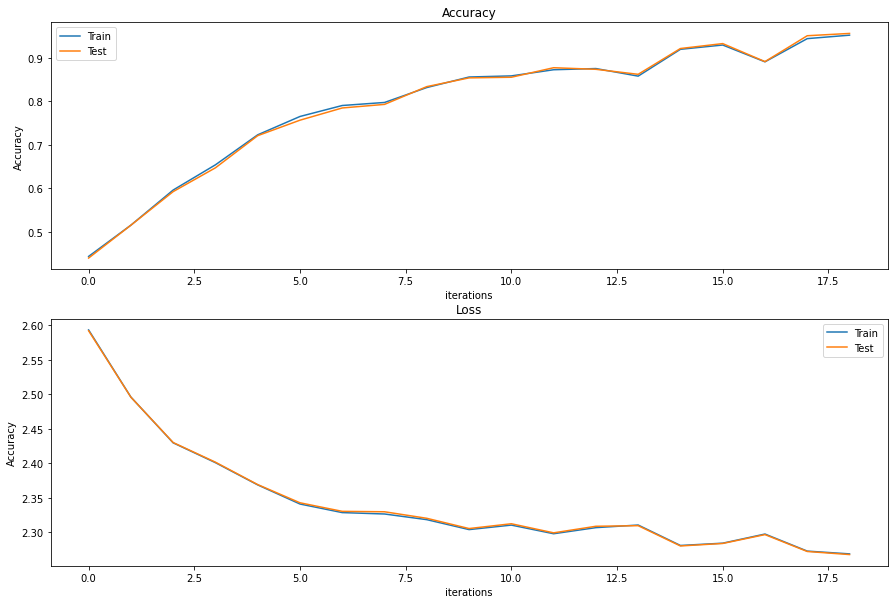

In [ ]:
iterations = list(range(epochs))
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize = (15, 10))
ax[0].plot(iterations, training_accuracy, label='Train')
ax[0].plot(iterations, testing_accuracy, label='Test')
ax[0].set(title = 'Accuracy',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[0].legend()
ax[1].plot(iterations, training_loss, label='Train')
ax[1].plot(iterations, testing_loss, label='Test')
ax[1].set(title = 'Loss',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[1].legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))
print("Train Loss: {0:.2f}".format(training_loss[-1]))
print("Test Loss:{0:.2f}".format(testing_loss[-1]))

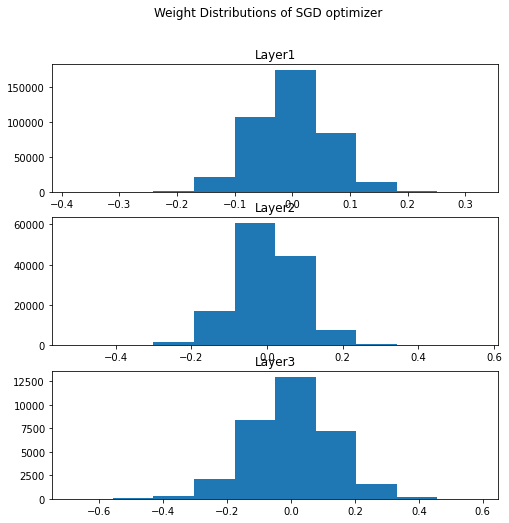

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols=1,figsize = (8, 8))
for i, a in enumerate(ax):   
    if i==0:
      a.hist(s.run(weights_0).reshape(-1,1), bins = 10)
    elif i==1:
      a.hist(s.run(weights_1).reshape(-1,1), bins = 10)
    else : 
      a.hist(s.run(weights_2).reshape(-1,1), bins = 10)
    a.set(title = 'Layer' + str(i+1))
fig.suptitle('Weight Distributions of SGD optimizer');

In [ ]:
# Training parameters with dropout and sgd optimizer
X_train = X_train + (0.35)*np.random.randn(X_train.shape[0],X_train.shape[1])
batch_size = 128
epochs=250
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
       s.run(optimizer_sgd, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:], keep_prob:dropout_prob} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train, keep_prob:1}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train, keep_prob:1}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation, keep_prob:1}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation, keep_prob:1}))
    if epoch%10 == 0:
      print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}")

Epoch:0, Train loss: 3.12 Train acc: 0.104, Test acc:0.153
Epoch:10, Train loss: 2.68 Train acc: 0.319, Test acc:0.358
Epoch:20, Train loss: 2.61 Train acc: 0.380, Test acc:0.423
Epoch:30, Train loss: 2.56 Train acc: 0.441, Test acc:0.504
Epoch:40, Train loss: 2.53 Train acc: 0.461, Test acc:0.524
Epoch:50, Train loss: 2.50 Train acc: 0.503, Test acc:0.568
Epoch:60, Train loss: 2.48 Train acc: 0.521, Test acc:0.597
Epoch:70, Train loss: 2.46 Train acc: 0.543, Test acc:0.616
Epoch:80, Train loss: 2.44 Train acc: 0.576, Test acc:0.644
Epoch:90, Train loss: 2.43 Train acc: 0.583, Test acc:0.651
Epoch:100, Train loss: 2.43 Train acc: 0.602, Test acc:0.673
Epoch:110, Train loss: 2.41 Train acc: 0.617, Test acc:0.697
Epoch:120, Train loss: 2.40 Train acc: 0.627, Test acc:0.695
Epoch:130, Train loss: 2.39 Train acc: 0.638, Test acc:0.714
Epoch:140, Train loss: 2.39 Train acc: 0.645, Test acc:0.723
Epoch:150, Train loss: 2.38 Train acc: 0.658, Test acc:0.729
Epoch:160, Train loss: 2.37 Train a

In [405]:
training = tf.placeholder_with_default(False, shape = (), name = 'training')

In [408]:
w_0= tf.constant_initializer((np.sqrt(4/float(num_features + num_layers_0 ))) * np.random.randn(num_features,num_layers_0))
ww_0 = tf.layers.dense(X_in, num_layers_0, use_bias=True)
batchNorm_0 = tf.layers.batch_normalization(ww_0, training=training, momentum=0.9)
batchNorm_0_act = tf.nn.relu(batchNorm_0)


w_1 = tf.constant_initializer((np.sqrt(4/float(num_layers_0 + num_layers_1))) * np.random.randn(num_layers_0,num_layers_1))
ww_1 = tf.layers.dense(batchNorm_0_act, num_layers_1, use_bias=True)
batchNorm_1 = tf.layers.batch_normalization(ww_1, training=training, momentum=0.9)
batchNorm_1_act = tf.nn.relu(batchNorm_1)


w_2 = tf.constant_initializer((np.sqrt(4/float(num_layers_1 + num_layers_2))) * np.random.randn(num_layers_1,num_layers_2))
ww_2 = tf.layers.dense(batchNorm_1_act, num_layers_2,  use_bias=True)
batchNorm_2 = tf.layers.batch_normalization(ww_2, training=training, momentum=0.9)
batchNorm_2_act = tf.nn.relu(batchNorm_2)


w_3 = tf.constant_initializer((np.sqrt(4/float(num_layers_2 + num_layers_3))) * np.random.randn(num_layers_2,num_layers_3))
ww_3 = tf.layers.dense(batchNorm_2_act, num_output,  use_bias=True)
batchNorm_3 = tf.layers.batch_normalization(ww_3, training=training, momentum=0.9)
batchNorm_3_act = tf.nn.relu(batchNorm_3)

w_4 = tf.constant_initializer((np.sqrt(1/float(num_layers_3))) * np.random.randn(num_layers_3,num_output))
ww_4 = tf.layers.dense(batchNorm_2_act, num_output,  use_bias=True)
batchNorm_4 = tf.layers.batch_normalization(ww_4, training=training, momentum=0.9)
y_pred_1 = tf.sigmoid(batchNorm_4)


In [409]:
loss_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred_1,labels=y_in))
optimizer_adam_1 = tf.train.AdamOptimizer(learning_rate).minimize(loss_1)

In [410]:
correct_prediction_2 = tf.equal(tf.argmax(y_train,1), tf.argmax(y_pred_1,1))
accuracy_2 = tf.reduce_mean(tf.cast(correct_prediction_2, tf.float32))

In [411]:
extra_graphkeys_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

In [412]:

batch_size = 170
epochs= 40
dropout_prob = 0.55
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []

s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run([optimizer_adam_1,extra_graphkeys_update_ops] ,feed_dict =  {X_in: X_train[arr[index:index+batch_size]][:],
                                           y_in: y_train[arr[index:index+batch_size]][:],
                                           training:True, keep_prob:dropout_prob})
        
    training_accuracy.append(s.run(accuracy_2, feed_dict= {X_in:X_train, 
                                                         y_in: y_train, keep_prob:1}))
    training_loss.append(s.run(loss_1, {X_in: X_train, 
                                      y_in: y_train, keep_prob:1}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred_1, {X_in: X_validation, keep_prob:1}).argmax(1)))
    testing_loss.append(s.run(loss_1, {X_in: X_validation, 
                                      y_in: y_validation, keep_prob:1}))
    

    tt_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(y_pred_1, {X_in: X_test, keep_prob:1}).argmax(1)))
    tt_loss.append(s.run(loss_1, {X_in: X_test, 
                                      y_in: y_test, keep_prob:1}))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}, tt acc : {tt_accuracy[epoch]}, tt loss: {tt_loss[epoch]}")

Epoch:0, Train loss: 2.66 Train acc: 0.998, Test acc:0.997, tt acc : 0.03457891801450084, tt loss: 3.212622880935669
Epoch:1, Train loss: 2.64 Train acc: 1.000, Test acc:0.999, tt acc : 0.03457891801450084, tt loss: 3.2126224040985107
Epoch:2, Train loss: 2.63 Train acc: 0.998, Test acc:0.999, tt acc : 0.04615170105967652, tt loss: 3.178053855895996
Epoch:3, Train loss: 2.61 Train acc: 0.999, Test acc:0.999, tt acc : 0.04615170105967652, tt loss: 3.178053855895996
Epoch:4, Train loss: 2.59 Train acc: 0.998, Test acc:0.996, tt acc : 0.04615170105967652, tt loss: 3.178053855895996
Epoch:5, Train loss: 2.59 Train acc: 0.995, Test acc:0.995, tt acc : 0.04615170105967652, tt loss: 3.178053855895996
Epoch:6, Train loss: 2.58 Train acc: 0.986, Test acc:0.983, tt acc : 0.04615170105967652, tt loss: 3.178053855895996
Epoch:7, Train loss: 2.59 Train acc: 0.959, Test acc:0.955, tt acc : 0.7856943669827106, tt loss: 2.760983943939209
Epoch:8, Train loss: 2.55 Train acc: 0.984, Test acc:0.984, tt a

In [ ]:
s_0 = tf.summary.scalar(name = 'loss', tensor = accuracy)
time_string = datetime.datetime.now().isoformat()
experiment_name = f"one_hidden_layer_1000_steps_{time_string}"
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(train_log_dir, s.graph)

In [440]:
batch_size = 170
epochs= 60
dropout_prob = 0.55
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
tt_accuracy = []
tt_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]})
        
   # summary = s.run(merged, feed_dict= {X_in:X_train, 
                                        # y_in: y_train})
   # train_writer.add_summary(summary, index)
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))
    tt_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(y_pred, {X_in: X_test}).argmax(1)))
    tt_loss.append(s.run(loss, {X_in: X_test, 
                                      y_in: y_test}))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}, tt acc : {tt_accuracy[epoch]}, tt loss: {tt_loss[epoch]}")

Epoch:0, Train loss: 2.54 Train acc: 0.396, Test acc:0.392, tt acc : 0.35652537646402677, tt loss: 2.579620599746704
Epoch:1, Train loss: 2.45 Train acc: 0.496, Test acc:0.499, tt acc : 0.43195761293920804, tt loss: 2.515836715698242
Epoch:2, Train loss: 2.38 Train acc: 0.672, Test acc:0.666, tt acc : 0.5766871165644172, tt loss: 2.479248285293579
Epoch:3, Train loss: 2.36 Train acc: 0.716, Test acc:0.713, tt acc : 0.5829615170105967, tt loss: 2.470130681991577
Epoch:4, Train loss: 2.32 Train acc: 0.810, Test acc:0.805, tt acc : 0.6777746793084216, tt loss: 2.430912971496582
Epoch:5, Train loss: 2.31 Train acc: 0.837, Test acc:0.834, tt acc : 0.7056609035136643, tt loss: 2.4467122554779053
Epoch:6, Train loss: 2.32 Train acc: 0.856, Test acc:0.854, tt acc : 0.7144450641383157, tt loss: 2.449105739593506
Epoch:7, Train loss: 2.30 Train acc: 0.864, Test acc:0.866, tt acc : 0.7076129392080313, tt loss: 2.44724440574646
Epoch:8, Train loss: 2.28 Train acc: 0.914, Test acc:0.915, tt acc : 0